In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

Importing standard libraries for data analysis and reading the data.
All operations would be performed using the pandas dataframe object

In [2]:
df = pd.read_csv('Datasets/adultdata.csv')

In [3]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'is_salary_above_50'],
      dtype='object')

In [5]:
df['native-country'].unique()
#Gets all the unique values in the native country column

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [6]:
len(df['education'].unique())

16

In [7]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [8]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [9]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

## Gets all the columns which have the values ? in it. This pertains to NULL values in rows which have to be cleaned

In [10]:
for i in df.columns:
    if ' ?' in df[i].unique() : 
        print(i, " : ", df[i].value_counts()[' ?'])

workclass  :  1836
occupation  :  1843
native-country  :  583


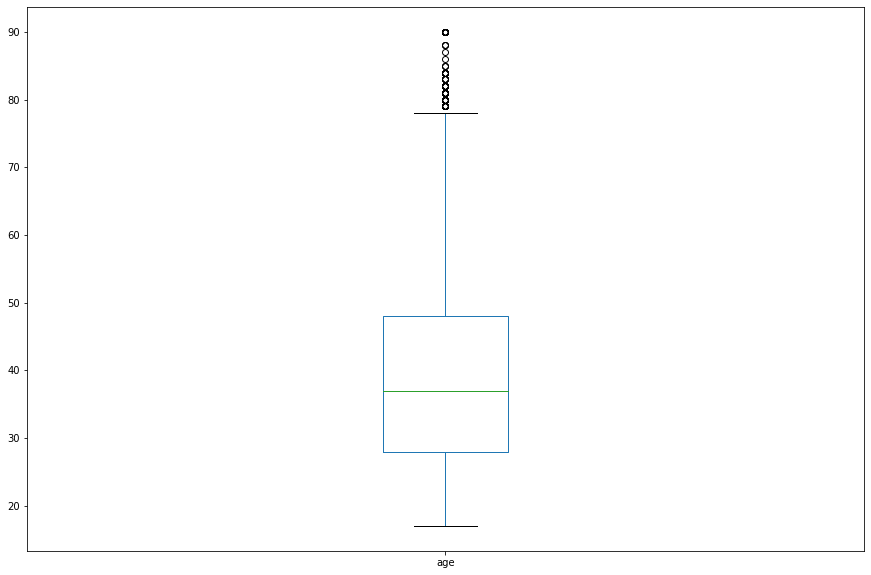

In [11]:
df['age'].plot.box(figsize = (15,10))

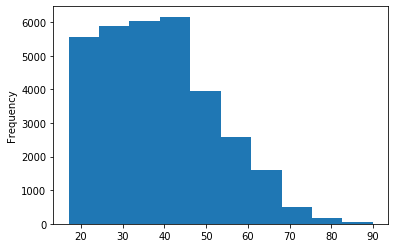

In [12]:
df['age'].plot(kind = 'hist')

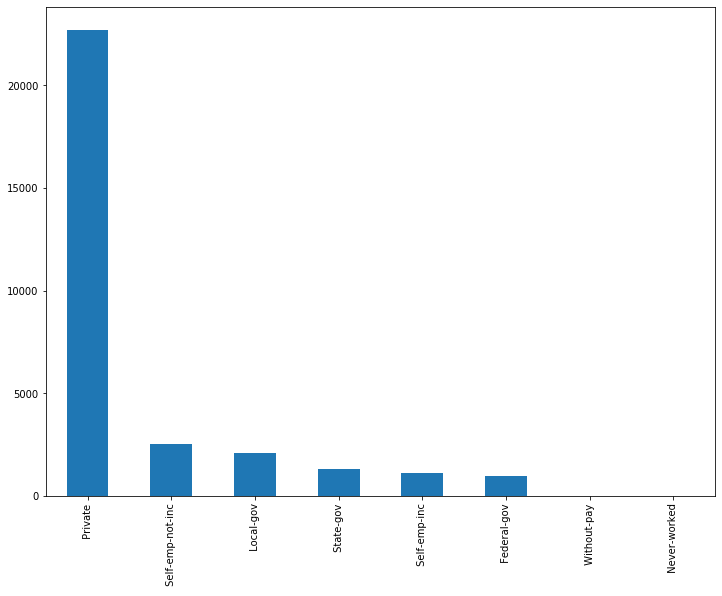

In [13]:
workclass_series = df['workclass'].value_counts(dropna = True)
workclass_series.pop(' ?')
workclass_series.plot(kind = 'bar',figsize = (12,9))


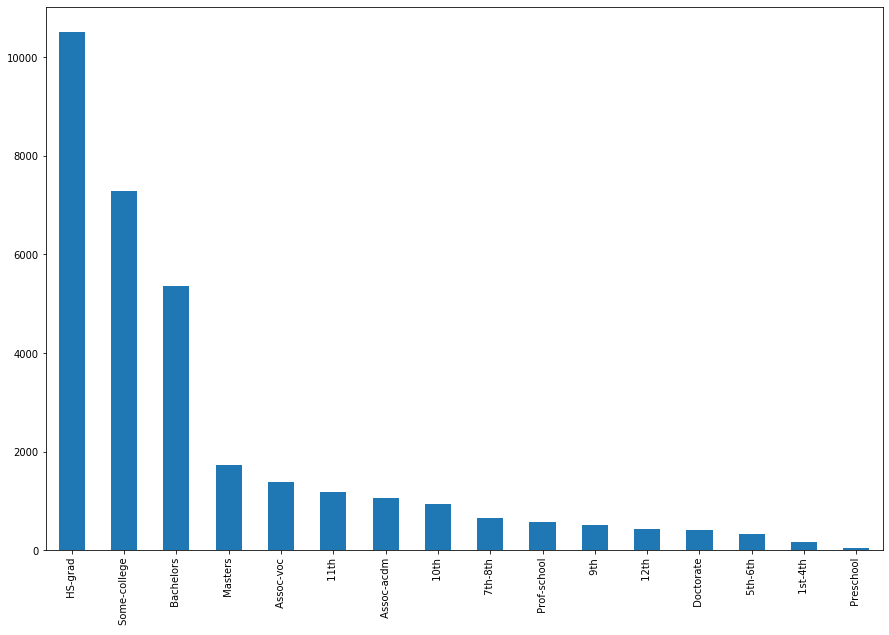

In [14]:
df['education'].value_counts().plot(kind = 'bar',figsize = (15,10))

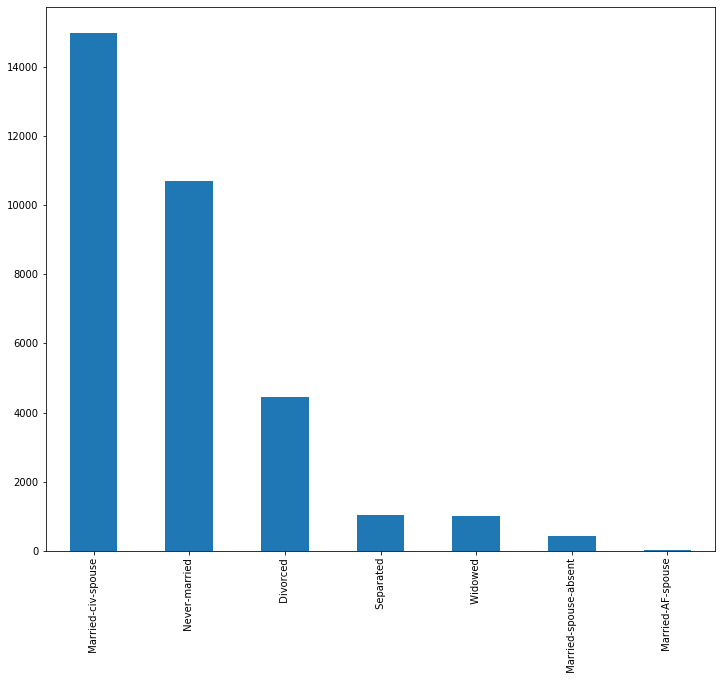

In [15]:
df['marital-status'].value_counts().plot(kind = 'bar',figsize = (12,10))

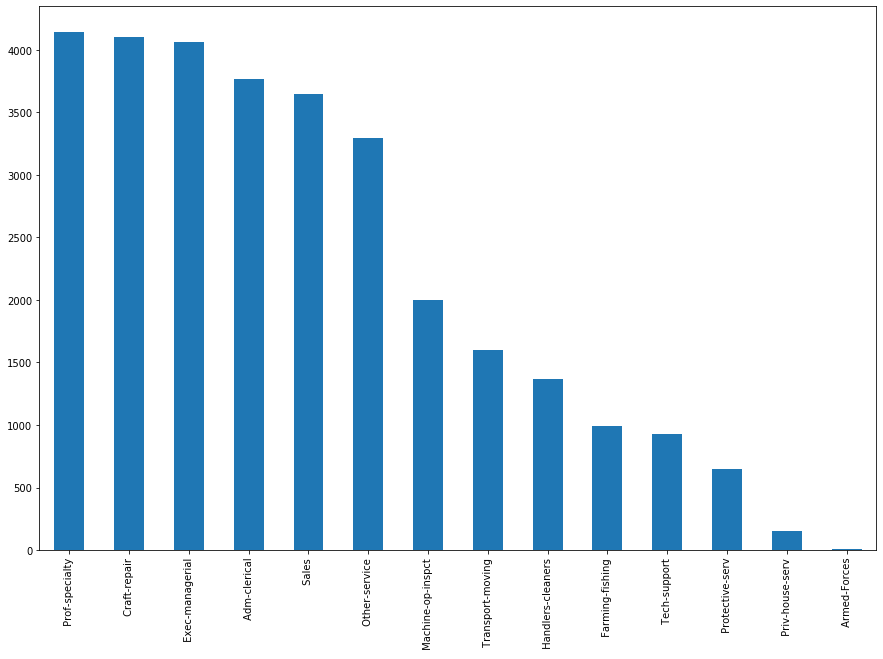

In [16]:
occupation_series = df['occupation'].value_counts(dropna = True)
occupation_series.pop(' ?')
occupation_series.plot(kind = 'bar',figsize = (15,10))

In [17]:
print(occupation_series)

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


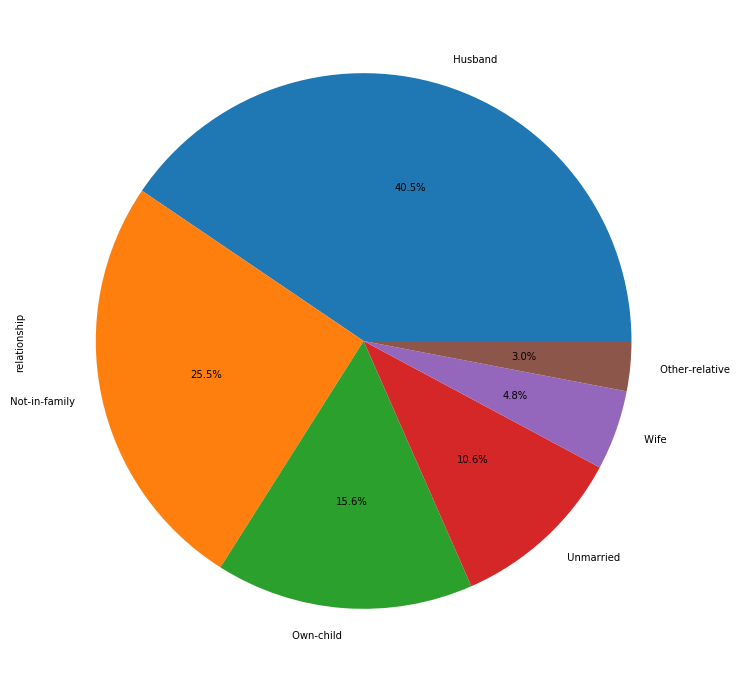

In [18]:
workclass_series = df['relationship'].value_counts(dropna = True)
workclass_series.plot(kind = 'pie',figsize = (12,19), autopct='%.1f%%')

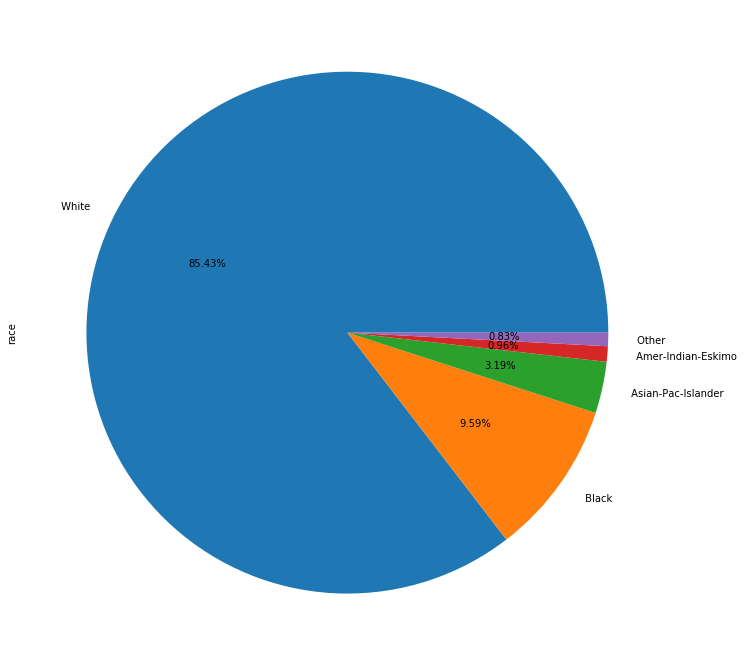

In [19]:
race_series = df['race'].value_counts().plot(kind = 'pie',figsize = (12,12), autopct='%.2f%%')

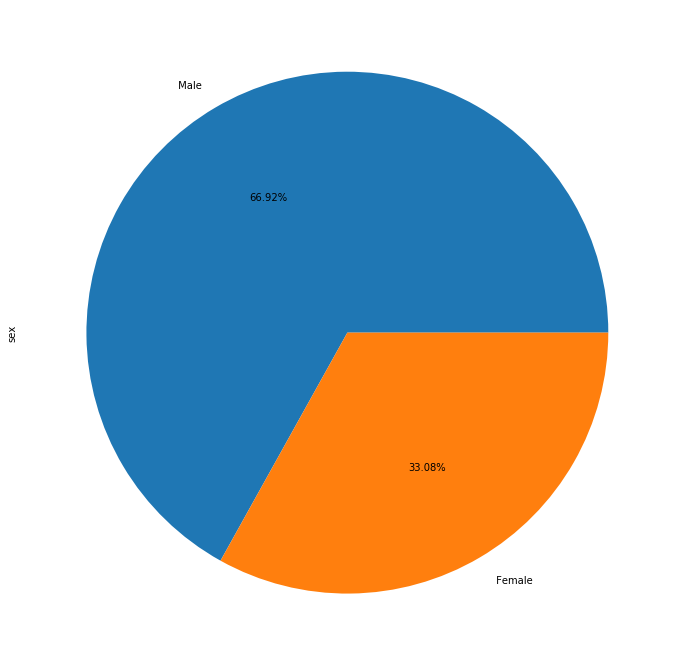

In [20]:
race_series = df['sex'].value_counts().plot(kind = 'pie',figsize = (12,12), autopct='%.2f%%')

In [21]:
print(df['capital-gain'].value_counts()[0])


29849


In [22]:
print(df['capital-loss'].value_counts()[0])


31042


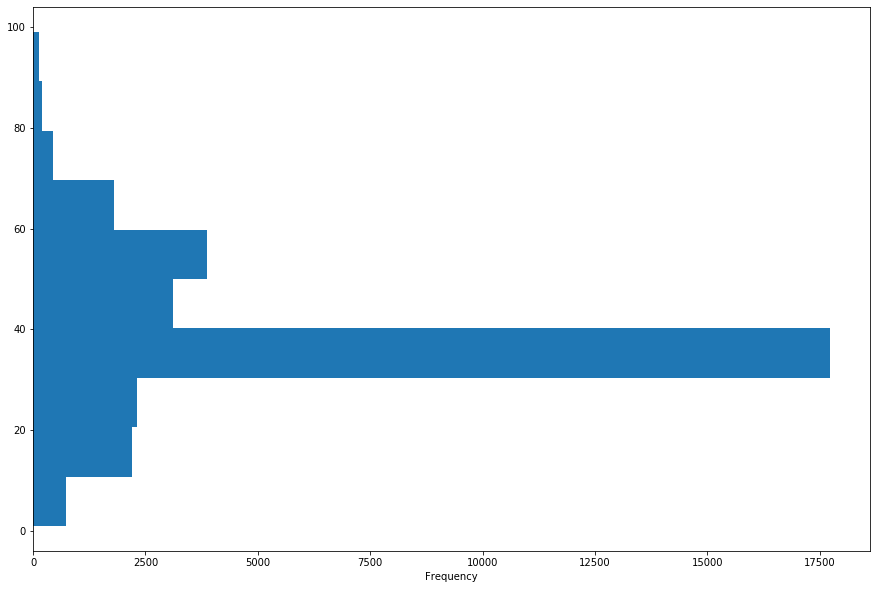

In [23]:
df['hours-per-week'].plot(kind = 'hist',orientation = 'horizontal',figsize = (15,10))

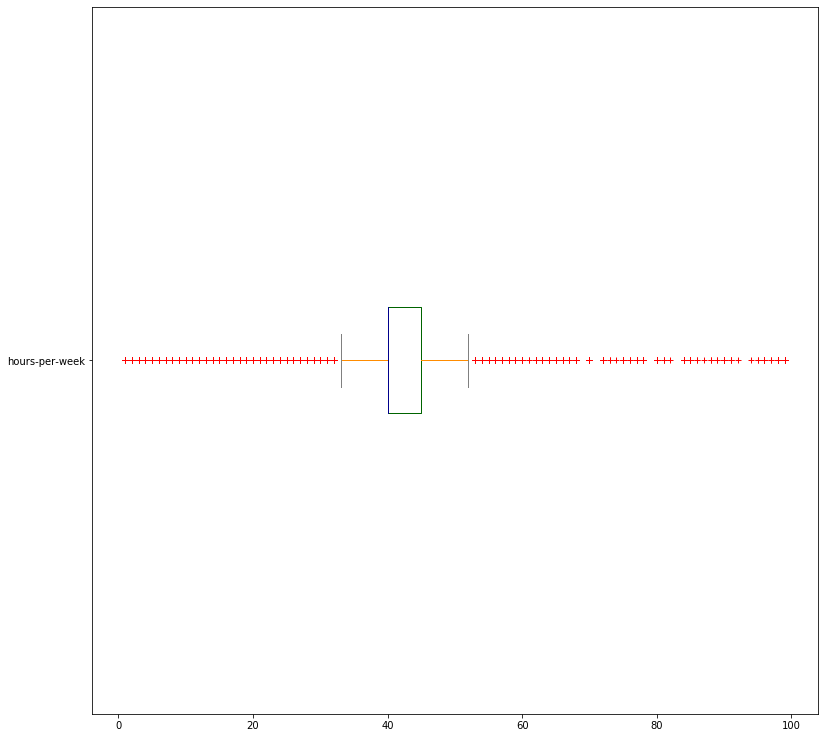

In [24]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}

df['hours-per-week'].plot.box(vert = False, figsize=(13,13), color = color, sym = 'r+')

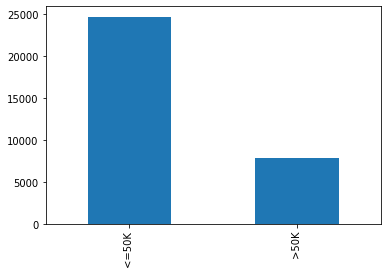

In [25]:
df['is_salary_above_50'].value_counts().plot(kind = 'bar')

In [26]:
cgdf = df.drop(df.loc[df['capital-gain']==0].index)


In [27]:
cldf = df.drop(df.loc[df['capital-loss']==0].index)

>50K :  1677 
<=50k :  1035


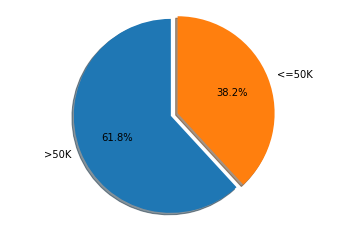

In [28]:
count_excess_50 = 0
count_below_50 = 0

for i in cgdf['is_salary_above_50']:
    if i.lstrip() == '>50K':
        count_excess_50 += 1
    else:
        count_below_50 += 1
        
print(">50K : ", count_excess_50, "\n<=50k : ", count_below_50)

labels = ['>50K','<=50K']
sizes = [count_excess_50,count_below_50]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels = labels,explode = (0, 0.075),autopct = '%1.1f%%',shadow = True,startangle = 90)
ax1.axis('equal')
plt.show()

>50K :  773 
<=50k :  746


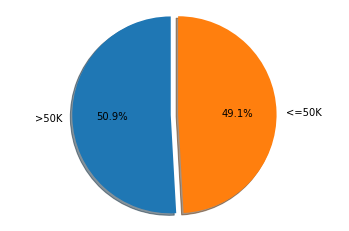

In [29]:
count_excess_50 = 0
count_below_50 = 0

for i in cldf['is_salary_above_50']:
    if i.lstrip() == '>50K':
        count_excess_50 += 1
    else:
        count_below_50 += 1

print(">50K : ", count_excess_50, "\n<=50k : ", count_below_50)

labels = ['>50K','<=50K']
sizes = [count_excess_50,count_below_50]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels = labels,explode = (0, 0.075),autopct = '%1.1f%%',shadow = True,startangle = 90)
ax1.axis('equal')
plt.show()

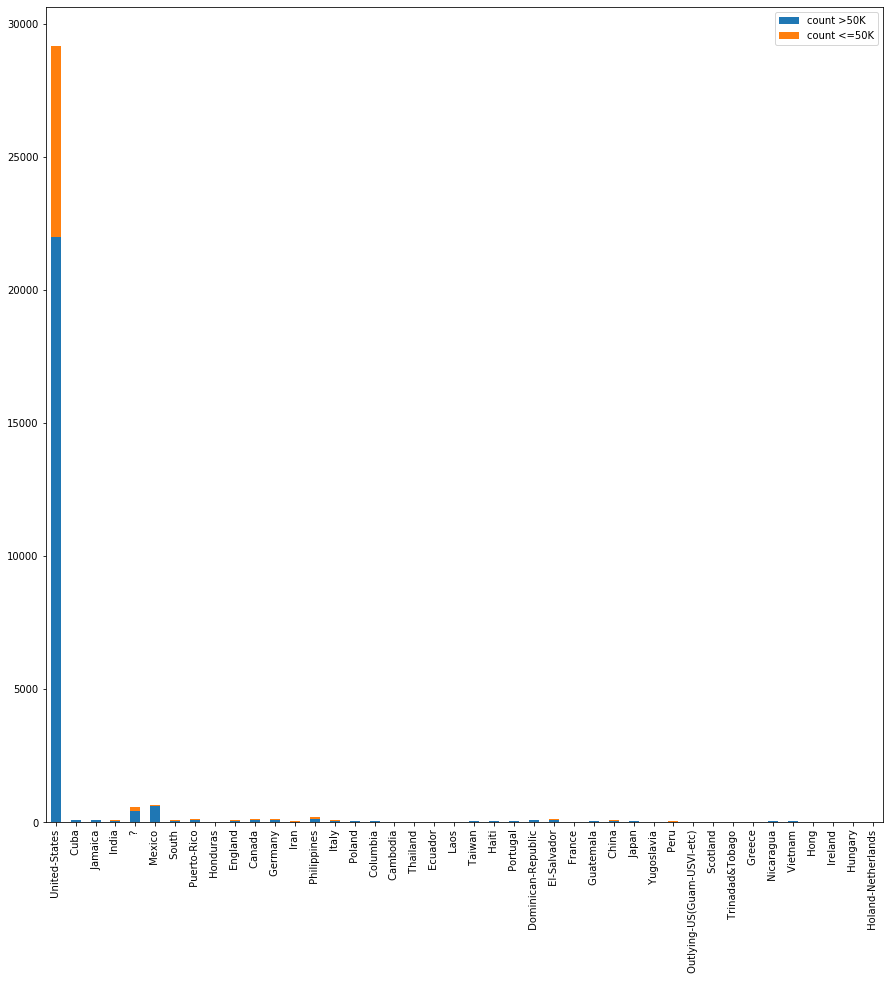

In [30]:
country_list = df['native-country'].unique()
values = [[0,0] for x in range(len(country_list))]
country_salary_dict = dict(zip(country_list, values))

for j in range(0,len(df['native-country'])) : 
    if df['is_salary_above_50'][j] == ' <=50K':
        country_salary_dict[df['native-country'][j]][0] +=1
    else:
        country_salary_dict[df['native-country'][j]][1] += 1
#      print(country_no_null_df['native-country'][j])

data_dict = dict()
data_dict['count >50K'] = [j[0] for j in country_salary_dict.values()]
data_dict['count <=50K'] = [j[1] for j in country_salary_dict.values()]

country_plot = pd.DataFrame( data = data_dict,index = country_salary_dict.keys() )

country_plot.plot.bar(stacked = True,figsize = (15,15))

Text(0, 0.5, 'Proportion of population')

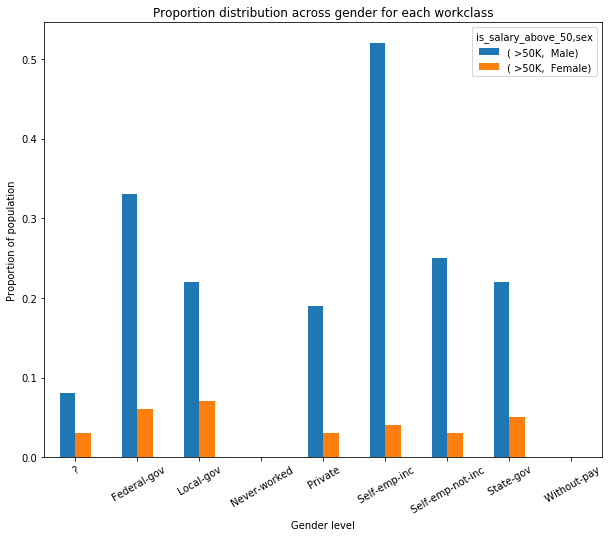

In [31]:
gender_workclass = round(pd.crosstab(df.workclass, [df.is_salary_above_50, df.sex]).div(pd.crosstab(df.workclass, [df.is_salary_above_50, df.sex]).apply(sum,1),0),2)
ax = gender_workclass[[(' >50K',' Male'), (' >50K',' Female')]].plot(kind = 'bar', title = 'Proportion distribution across gender for each workclass', figsize = (10,8), rot = 30)
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

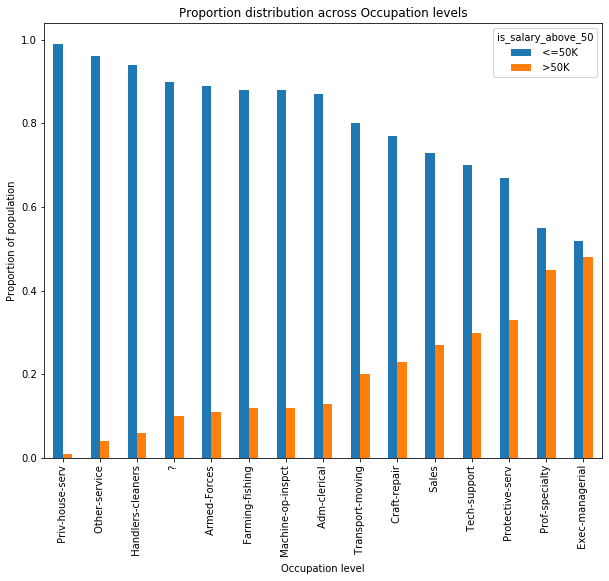

In [32]:
occupation = round(pd.crosstab(df.occupation, df.is_salary_above_50).div(pd.crosstab(df.occupation, df.is_salary_above_50).apply(sum,1),0),2)
occupation.sort_values(by = ' >50K', inplace = True)
ax = occupation.plot(kind ='bar', title = 'Proportion distribution across Occupation levels', figsize = (10,8))
ax.set_xlabel('Occupation level')
ax.set_ylabel('Proportion of population')

print()


Text(0, 0.5, 'Proportion of population')

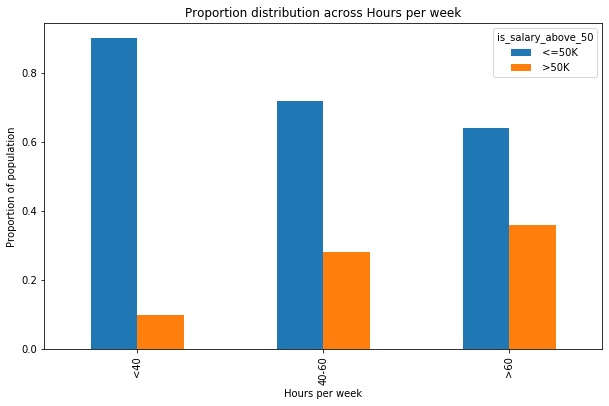

In [33]:
sdf = df.copy()
sdf['hour_worked_bins'] = ['<40' if i < 40 else '40-60' if i <= 60 else '>60'  for i in df['hours-per-week']]
sdf['hour_worked_bins'] = sdf['hour_worked_bins'].astype('category')
hours_per_week = round(pd.crosstab(sdf.hour_worked_bins, sdf.is_salary_above_50).div(pd.crosstab(sdf.hour_worked_bins, sdf.is_salary_above_50).apply(sum,1),0),2)

hours_per_week.sort_values(by = ' >50K', inplace = True)
ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (10,6))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion of population')


Hours-per-week is split into 3 parts: 
    <40
    40-60
    >60
    
This is done to make a more concise graph for better relationship comparision between hours-per-week and population proportion

## Correlation matrix

In [34]:
display(df.corr())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


### We see that none of the values are highly/significantly correlated
The most correlated columns are education-num and hours-per-week.

The least correlated column is final weight and capital-gain

## Missing value replacement in the dataset
workclass  :  1836
occupation  :  1843
native-country  :  583

Replacement of missing or NULL values in the native-country column can be done by evaluating the mode of the column and replacing all the ' ?' values in the column with the mode. In this case the mode clearly is United-States.


Replacement of missing values in the workclass and occupation column can be done by predicting them using Logistic Regression.

Independent variables in this case would be all the other attributes and the column being treated for the missing values would be the dependent variable.

The value of occupation for a row missing its value can be determined using Logistic Regression.
This is a multi-class classification problem with around 42 features.

In [35]:
#For native-country -replacement by mode
df.loc[df['native-country'] == ' ?','native-country'] = ' United-States'

In [36]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [37]:
def oneHotCatVars(df, df_cols):
    
    df_1 = adult_data = df.drop(columns = df_cols, axis = 1)
    df_2 = pd.get_dummies(df[df_cols])
    
    return (pd.concat([df_1, df_2], axis=1, join='inner'))

In [38]:
#Filling in missing values for occupation

test_data = df[(df.occupation.values == ' ?')].copy()
test_label = test_data.occupation


train_data = df[(df.occupation.values != ' ?')].copy()
train_label = train_data.occupation
#Dropping columns not significant for Logistic Regression
test_data.drop(columns = ['occupation','workclass','capital-gain','capital-loss','native-country'], inplace = True)
train_data.drop(columns = ['occupation','workclass','capital-gain','capital-loss','native-country'], inplace = True)

#One-hot encoding of variables
train_data = oneHotCatVars(train_data,['education','marital-status','relationship','race','sex','is_salary_above_50'])
test_data = oneHotCatVars(test_data,['education','marital-status','relationship','race','sex','is_salary_above_50'])

#Using the LogisticRegression function from sklearn
log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)

majority_class = df['occupation'].value_counts().index[0]

pred_df =  pd.DataFrame({'LogReg' : log_reg_pred})
df.loc[(df['occupation'].values == ' ?'),'occupation'] = pred_df.values

In [39]:
#Filling in missing values for workclass

test_data = df[(df.workclass.values == ' ?')].copy()
test_label = test_data.workclass


train_data = df[(df.workclass.values != ' ?')].copy()
train_label = train_data.workclass
#Dropping columns not significant for Logistic Regression
test_data.drop(columns = ['occupation','workclass','capital-gain','capital-loss','native-country'], inplace = True)
train_data.drop(columns = ['occupation','workclass','capital-gain','capital-loss','native-country'], inplace = True)

#One-hot encoding of variables
train_data = oneHotCatVars(train_data,['education','marital-status','relationship','race','sex','is_salary_above_50'])
test_data = oneHotCatVars(test_data,['education','marital-status','relationship','race','sex','is_salary_above_50'])

#Using the LogisticRegression function from sklearn
log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)

majority_class = df['workclass'].value_counts().index[0]

pred_df =  pd.DataFrame({'LogReg' : log_reg_pred})
df.loc[(df['workclass'].values == ' ?'),'workclass'] = pred_df.values

Occupation and Workclass for the 27th row (which previously had NULL values is now replaced by Exec-managerial and Private

In [40]:
df.iloc[27]

age                                    54
workclass                         Private
fnlwgt                             180211
education                    Some-college
education-num                          10
marital-status         Married-civ-spouse
occupation                Exec-managerial
relationship                      Husband
race                   Asian-Pac-Islander
sex                                  Male
capital-gain                            0
capital-loss                            0
hours-per-week                         60
native-country                      South
is_salary_above_50                   >50K
Name: 27, dtype: object

In [41]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [42]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

## Feature selection
The model to be created must acheive high accuracy on predicting whether a person's salary is above or below 50K.
Therfore some columns which do not convey meaning towards the predictor must be dropped as to not confuse the model and result in lower accuracy.

Features being dropped : 
    -Education and educational-num convey the same meaning i.e the level of education of a person. So to avoid the effect 
     of this variable to be overstated, one of them (education-num - categorical) will be removed.
    
   -Also the 'Fnlwgt' attribute that is used by the census is not chosen as the inverse of sampling fraction                  adjusted for non-response and over or under sampling of particular groups. This attribute does not convey                individual related meaning.
    
    
Catergorical variables : workclass , marital-status , occupation , relationship, race , sex , native-country


In [43]:
df.drop(columns = ['fnlwgt','education'],inplace = True)

In [44]:
df.iloc[5]

age                                    37
workclass                         Private
education-num                          14
marital-status         Married-civ-spouse
occupation                Exec-managerial
relationship                         Wife
race                                White
sex                                Female
capital-gain                            0
capital-loss                            0
hours-per-week                         40
native-country              United-States
is_salary_above_50                  <=50K
Name: 5, dtype: object

In [45]:
df = oneHotCatVars(df,['marital-status','relationship','race','sex','native-country','occupation','workclass'])
df

,age,education-num,capital-gain,capital-loss,hours-per-week,is_salary_above_50,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,...,occupation_ Tech-support,occupation_ Transport-moving,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,39,13,2174,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,13,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,<=50K,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53,7,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,28,13,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,<=50K,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
32557,40,9,0,0,40,>50K,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
32558,58,9,0,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
32559,22,9,0,0,20,<=50K,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
df.iloc[5]

age                            37
education-num                  14
capital-gain                    0
capital-loss                    0
hours-per-week                 40
                               ..
workclass_ Private              1
workclass_ Self-emp-inc         0
workclass_ Self-emp-not-inc     0
workclass_ State-gov            0
workclass_ Without-pay          0
Name: 5, Length: 89, dtype: object

## Normalization

In [47]:
def normalize(df,columns):
    result = df.copy()
    for feature_name in columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [48]:
df = normalize(df,columns = ['age','education-num','capital-gain','capital-loss','hours-per-week'])

In [49]:
df.iloc[0]

age                              0.30137
education-num                        0.8
capital-gain                   0.0217402
capital-loss                           0
hours-per-week                  0.397959
                                 ...    
workclass_ Private                     0
workclass_ Self-emp-inc                0
workclass_ Self-emp-not-inc            0
workclass_ State-gov                   1
workclass_ Without-pay                 0
Name: 0, Length: 89, dtype: object

## Hypothesis testing

Binary classification problem to predict if the persons salary is greater or below 50K.
A basic SVM classifier might give decent results.



In [50]:
#Reading the test and train datasets. The train dataset is df itself.
test_df = pd.read_csv('Datasets/adulttest.csv')

In [51]:
#Cleaning data for test dataset
df.loc[df.is_salary_above_50 == ' <=50K','is_salary_above_50'] = 0
df.loc[df.is_salary_above_50 == ' >50K','is_salary_above_50'] = 1


test_df.loc[test_df['native-country'] == ' ?','native-country'] = ' United-States'

test_data = test_df[(test_df.occupation.values == ' ?')].copy()
test_label = test_data.occupation


train_data = test_df[(test_df.occupation.values != ' ?')].copy()
train_label = train_data.occupation
#Dropping columns not significant for Logistic Regression
test_data.drop(columns = ['occupation','workclass','capital-gain','capital-loss','native-country'], inplace = True)
train_data.drop(columns = ['occupation','workclass','capital-gain','capital-loss','native-country'], inplace = True)

#One-hot encoding of variables
train_data = oneHotCatVars(train_data,['education','marital-status','relationship','race','sex','is_salary_above_50'])
test_data = oneHotCatVars(test_data,['education','marital-status','relationship','race','sex','is_salary_above_50'])

#Using the LogisticRegression function from sklearn
log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)

majority_class = test_df['occupation'].value_counts().index[0]

pred_df =  pd.DataFrame({'LogReg' : log_reg_pred})
test_df.loc[(test_df['occupation'].values == ' ?'),'occupation'] = pred_df.values


#Filling in missing values for workclass

test_data = test_df[(test_df.workclass.values == ' ?')].copy()
test_label = test_data.workclass


train_data = test_df[(test_df.workclass.values != ' ?')].copy()
train_label = train_data.workclass
#Dropping columns not significant for Logistic Regression
test_data.drop(columns = ['occupation','workclass','capital-gain','capital-loss','native-country'], inplace = True)
train_data.drop(columns = ['occupation','workclass','capital-gain','capital-loss','native-country'], inplace = True)

#One-hot encoding of variables
train_data = oneHotCatVars(train_data,['education','marital-status','relationship','race','sex','is_salary_above_50'])
test_data = oneHotCatVars(test_data,['education','marital-status','relationship','race','sex','is_salary_above_50'])

#Using the LogisticRegression function from sklearn
log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)

majority_class = test_df['workclass'].value_counts().index[0]

pred_df =  pd.DataFrame({'LogReg' : log_reg_pred})
test_df.loc[(test_df['workclass'].values == ' ?'),'workclass'] = pred_df.values
test_df.drop(columns = ['fnlwgt','education','is_salary_above_50'],inplace = True)
test_df = oneHotCatVars(test_df,['marital-status','relationship','race','sex','native-country','occupation','workclass'])
test_df = normalize(test_df,columns = ['age','education-num','capital-gain','capital-loss','hours-per-week'])

In [52]:
test_df.iloc[4]

age                            0.013699
education-num                  0.600000
capital-gain                   0.000000
capital-loss                   0.000000
hours-per-week                 0.295918
                                 ...   
workclass_ Private             1.000000
workclass_ Self-emp-inc        0.000000
workclass_ Self-emp-not-inc    0.000000
workclass_ State-gov           0.000000
workclass_ Without-pay         0.000000
Name: 4, Length: 87, dtype: float64

In [53]:

test_df.iloc[5]
df.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'is_salary_above_50', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'race_ Amer-Indian-Eskimo',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White',
       'sex_ Female', 'sex_ Male', 'native-country_ Cambodia',
       'native-country_ Canada', 'native-country_ China',
       'native-country_ Columbia', 'native-country_ Cuba',
       'native-country_ Dominican-Republic', 'native-country_ Ecuador',
       'native-country_ El-Salvador', 'native-country_ England',
       'nati

In [54]:
def model_eval(actual, pred):
    correct = 0
    for i in range(len(actual)) : 
        print(actual[i],pred[i])
        if(pred[i]==0 and actual[i]== ' <=50K.') : 
            correct+=1
        elif(pred[i]==1 and actual[i]==' >50K.'):
            correct+=1
            
    accuracy = correct/len(pred)
    return accuracy


In [55]:
#Logistic Regression
log_reg = LogisticRegression(penalty = 'l2', dual = False, tol = 1e-4, fit_intercept = True, 
                            solver = 'liblinear')
#This is Y for the train dataset ie if the salary is grater than 50K or not.
train_label = df['is_salary_above_50']
#Dropping some columns from the train dataset which are not required.
#Y for test dataset is dropped since its the value to be predicted by our model.
df.drop(columns = ['is_salary_above_50','native-country_ Holand-Netherlands'],inplace = True)
#Optimizing our 
log_reg.fit(df, train_label)

test_data  = pd.read_csv('Datasets/adulttest.csv')

test_label = test_data['is_salary_above_50']
print(test_label)

log_reg_pred = log_reg.predict(test_df)
logistic_reg = model_eval(test_label, log_reg_pred)
print('Logistic Regression : %.2f percent.' % (round(logistic_reg*100,3)))

print('### 3.5.2. Model Evaulation ')
ovl_logreg = round(pd.DataFrame([logistic_reg], index = ['logistic_reg']),4)
display(ovl_logreg)


0         <=50K.
1         <=50K.
2          >50K.
3          >50K.
4         <=50K.
          ...   
16276     <=50K.
16277     <=50K.
16278     <=50K.
16279     <=50K.
16280      >50K.
Name: is_salary_above_50, Length: 16281, dtype: object
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K.

 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 >50K. 0
 <=50K. 1
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 1
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 >50K. 1
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 >50K. 1
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 1
 >50K. 1
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 1
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K.

 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 1
 >50K. 1
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 1
 >50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 >50K. 1
 <=50K. 0
 >50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 

 <=50K. 0
 >50K. 1
 >50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 >50K. 1
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 1
 >50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 >50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 1
 >50K. 1
 >50K. 1
 >50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0


 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 >50K. 1
 <=50K. 0
 >50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 1
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 >50K. 1
 >50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <

 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 0
 >50K. 1
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 >50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 1
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 >50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 >50K. 0
 >50K. 1
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 >50K. 1
 <=50K. 0
 >50K. 0
 <=50K. 0
 >50K. 1
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K.

 <=50K. 1
 <=50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 1
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 >50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 1
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 >50K. 1
 <=50K. 0
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <

 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 >50K. 1
 >50K. 1
 >50K. 0
 <=50K. 0
 <=50K. 1
 >50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 >50K. 0
 <=50K. 1
 >50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50

 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 >50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 0
 <=50K. 0
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 >50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 1
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=5

 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 1
 <=50K. 0
 >50K. 0
 >50K. 1
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 0
 >50K. 0
 >50K. 1
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 1
 >50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 >50K. 1
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 1
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 

 <=50K. 0
 <=50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 >50K. 1
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 1
 <=50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 1
 >50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 1
 >50K. 0
 >50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 1
 >50K. 1
 >50K. 1
 <=50K. 0
 >50K. 1
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K.

 <=50K. 0
 >50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 >50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 >50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 >50K. 0
 >50K. 1
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 >50K. 0
 >50K. 1
 <=50K. 0
 >50K. 0
 <=50K. 0
 >50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 1
 >50K. 1
 >50K. 1
 

 >50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 1
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 1
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 1
 >50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 1
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 

 <=50K. 1
 <=50K. 0
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 >50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 >50K. 0
 <=50K. 1
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 0
 <=50K. 0
 <=50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 1
 <=50K. 0
 <=50K. 0
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 1
 >50K. 1
 <=50K. 0
 >50K. 1
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 >50K. 1
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K. 0
 <=50K

,0
logistic_reg,0.8492


In [56]:
print('Logistic Regression : %.2f percent.' % (round(logistic_reg*100,3)))


Logistic Regression : 84.92 percent.


## The accuracy of applying Logistic Regression on the test dataset when trained from df is thus 84.92%